RDD Implementation

Installing Bokeh that will be used for visualization

In [0]:
%pip install bokeh

Python interpreter will be restarted.
Python interpreter will be restarted.


Setting up the variables that controls the entire notebook for reusability

In [0]:
fileA = 'clinicaltrial_2021'
fileB = 'mesh'
fileC = 'pharma'
year = '2021'

Importing the functions and environments that will be used for the implementation and visualization

In [0]:
import calendar
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.embed import components, file_html
from bokeh.resources import CDN
from bokeh.core.properties import value
from matplotlib import pyplot as plt

Creation of clinicaltrial's (fileA) RDD from the exiting dataframe

In [0]:
file_location = "/FileStore/tables/"+fileA+".csv"
file_type = "csv"

infer_schema = "True"
first_row_is_header = "True"
delimiter = "|"

clinicaltrialdf = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/"+fileA+".csv")

clinicaltrialRDD1=clinicaltrialdf.rdd
clinicaltrialRDD1.take(5)

Out[3]: [Row(Id='NCT02758028', Sponsor='The University of Hong Kong', Status='Recruiting', Start='Aug 2005', Completion='Nov 2021', Type='Interventional', Submission='Apr 2016', Conditions=None, Interventions=None),
 Row(Id='NCT02751957', Sponsor='Duke University', Status='Completed', Start='Jul 2016', Completion='Jul 2020', Type='Interventional', Submission='Apr 2016', Conditions='Autistic Disorder,Autism Spectrum Disorder', Interventions=None),
 Row(Id='NCT02758483', Sponsor='Universidade Federal do Rio de Janeiro', Status='Completed', Start='Mar 2017', Completion='Jan 2018', Type='Interventional', Submission='Apr 2016', Conditions='Diabetes Mellitus', Interventions=None),
 Row(Id='NCT02759848', Sponsor='Istanbul Medeniyet University', Status='Completed', Start='Jan 2012', Completion='Dec 2014', Type='Observational', Submission='May 2016', Conditions='Tuberculosis,Lung Diseases,Pulmonary Disease', Interventions=None),
 Row(Id='NCT02758860', Sponsor='University of Roma La Sapienza', S

Creation of clinicaltrials RDD using sc.textFile

In [0]:
clinicaltrialRDD = sc.textFile("DBFS:/FileStore/tables/"+fileA+".csv")
clinicaltrialRDD.take(5)

Out[4]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

Removing the clinicaltrials Header

In [0]:
headerA = clinicaltrialRDD.first()
HeaderfileARDD = clinicaltrialRDD.filter(lambda line: line!= headerA)
HeaderfileARDD.take(5)

Out[5]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

Creating mesh (fileB) RDD using the existing dataframe

In [0]:
file_location = "/FileStore/tables/"+fileB+".csv"
file_type = "csv"

infer_schema = "True"
first_row_is_header = "True"
delimiter = ","

meshdf = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/"+fileB+".csv")

meshRDD1=meshdf.rdd
meshRDD1.take(5)

Out[6]: [Row(term='Calcimycin', tree='D03.633.100.221.173'),
 Row(term='A-23187', tree='D03.633.100.221.173'),
 Row(term='Temefos', tree='D02.705.400.625.800'),
 Row(term='Temefos', tree='D02.705.539.345.800'),
 Row(term='Temefos', tree='D02.886.300.692.800')]

Creating mesh (fileB) RDD using a second method (sc.textfile)

In [0]:
meshRDD= sc.textFile("DBFS:/FileStore/tables/"+fileB+".csv")
meshRDD.take(10)

Out[7]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800']

Removing the Header of mesh (fileB) RDD

In [0]:
headerB = meshRDD.first()
HeaderfileBRDD = meshRDD.filter(lambda line: line!= headerB)
HeaderfileBRDD.take(10)

Out[8]: ['Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800',
 'Difos,D02.705.539.345.800']

Creating pharma (fileC) RDD using the existing dataframe

In [0]:
file_location = "/FileStore/tables/"+fileC+".csv"
file_type = "csv"

infer_schema = "True"
first_row_is_header = "True"
delimiter = ","

pharmadf = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load("/FileStore/tables/"+fileC+".csv")

pharmaRDD1=pharmadf.rdd
pharmaRDD1.take(5)

Out[9]: [Row(Company='Abbott Laboratories', Parent_Company='Abbott Laboratories', Penalty_Amount='$5,475,000', Subtraction_From_Penalty='$0', Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting='$5,475,000', Penalty_Year=2013, Penalty_Date=20131227, Offense_Group='government-contracting-related offenses', Primary_Offense='False Claims Act and related', Secondary_Offense='kickbacks and bribery', Description="Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.", Level_of_Government='federal', Action_Type='agency action', Agency='Justice Department Civil Division', Civil/Criminal='civil', Prosecution_Agreement=None, Court=None, Case_ID=None, Private_Litigation_Case_Title=None, Lawsuit_Resolution=None, Facility_State=None, City=None, Address=None, Zip=None, NAICS_Code=None, NAICS_Translation=None, HQ_Country_of_Parent=

Creating Pharma (fileC) RDD using a second method (sc.textfile)

In [0]:
pharmaRDD= sc.textFile("DBFS:/FileStore/tables/"+fileC+".csv")
pharmaRDD.take(10)

Out[10]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

Removing the Header of pharma (fileC) RDD

In [0]:
headerC = pharmaRDD.first()
HeaderfileCRDD = pharmaRDD.filter(lambda line: line!= headerC)
HeaderfileCRDD.take(10)

Out[11]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

Question 1 : Counting number of distinct studies in the dataset.

In [0]:
HeaderfileARDD.distinct().count()

Out[12]: 387261

Question 2: Listing all the types of studies in the dataset along with the frequencies of each type ordered from most frequent to least frequent. First the RDD was splited by the delimiter "|" followed by the use of lambda to map, reduceByKey and sortBy in descending order

In [0]:
SplitfileARDD = HeaderfileARDD.map(lambda x: (x.split ("|")))

In [0]:
TypefileARDD= SplitfileARDD.map(lambda a: (a[5],int(1)))\
.reduceByKey(lambda a, b: a+b)\
.sortBy(lambda a: a[1], ascending=False)
TypefileARDD.collect()

Out[14]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

Question 3: Getting the top 5 conditions (from Conditions) with their frequencies. It was first split by ","

In [0]:
fileAConditionRDD= SplitfileARDD.map(lambda a: (a[7]))\
.flatMap(lambda x: (x.split(",")))
fileAConditionRDD.take(10)

Out[15]: ['',
 'Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum',
 'Diverticulosis']

With the use of lambda function, the conditions were filtered to remove the empty spaces, mapped and reducedByKey inorder to sort in descending order

In [0]:
EmptySpace= ['']
FilterfileAConditionRDD=fileAConditionRDD.filter(lambda x: x not in EmptySpace)\
.map(lambda a: (a,1))\
.reduceByKey(lambda a, b: a+b)\
.sortBy(lambda a: a[1], ascending=False)
FilterfileAConditionRDD.take(5)

Out[16]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

Visualizing the top five conditions with their frquency

In [0]:
output_file("bars.html")
 
root = FilterfileAConditionRDD.map(lambda a: a[0]).take(5)
Count = FilterfileAConditionRDD.map(lambda a: a[1]).take(5)
 
p = figure(x_range=root, plot_height=350, title="Top Five Conditions",
           toolbar_location=None, tools="")
 
p.vbar(x=root, top=Count, width=0.7)
 
p.xgrid.grid_line_color = None
p.y_range.start = 0
 
html = file_html(p, CDN, "bar")
displayHTML(html)

<!DOCTYPE html>
 
 
 
 
 
 bar

Question 4: Getting the 5 most frequent roots after mapping each condition to one or more hierarchy codes, First the Spliting of mesh (fileB) RDD by the delimiter ","

In [0]:
SplitfileBRDD=HeaderfileBRDD.map(lambda row: (row.split(",")))
SplitfileBRDD.take(10)

Out[18]: [['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800'],
 ['Abate', 'D02.705.400.625.800'],
 ['Abate', 'D02.705.539.345.800'],
 ['Abate', 'D02.886.300.692.800'],
 ['Difos', 'D02.705.400.625.800'],
 ['Difos', 'D02.705.539.345.800']]

Joining fileA(clinicaltrials) with fileB(Mesh), mapping the content, spliting with ".", reducing by key to sum their frequencies and then sorting by the most frequent roots

In [0]:
fileAfileBJoin=FilterfileAConditionRDD.join(SplitfileBRDD)\
.map(lambda a: (a[1]))\
.map(lambda a: (a[1],a[0]))\
.map(lambda a: (a[0].split('.')[0],a[1]))\
.reduceByKey(lambda a,b: a+b )\
.sortBy(lambda a: a[1], ascending=False)
fileAfileBJoin.take(5)

Out[19]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

Visualizing the result using bokeh bar chart earlier imported

In [0]:
output_file("bars.html")
 
root = fileAfileBJoin.map(lambda a: a[0]).take(5)
Count = fileAfileBJoin.map(lambda a: a[1]).take(5)
 
p = figure(x_range=root, plot_height=350, title="Five Most Frequent Roots",
           toolbar_location=None, tools="")
 
p.vbar(x=root, top=Count, width=0.7)
 
p.xgrid.grid_line_color = None
p.y_range.start = 0
 
html = file_html(p, CDN, "bar")
displayHTML(html)

<!DOCTYPE html>
 
 
 
 
 
 bar

Question 5: Getting 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. First the Spliting of pharma (fileC) RDD by the delimiter ",", mapping and reducingByKey

In [0]:
FinalfileCRDD= HeaderfileCRDD.map(lambda line: line.replace('"','').split(',')[1])\
.map(lambda a: (a,1))\
.reduceByKey(lambda a,b: a+b)
FinalfileCRDD.take(10)

Out[21]: [('Abbott Laboratories', 26),
 ('AbbVie', 38),
 (' LLC', 26),
 ('AstraZeneca', 22),
 ('Sanofi', 24),
 ('AVEO Pharmaceuticals', 1),
 ('Bausch Health', 11),
 ('GlaxoSmithKline', 31),
 ('Teva Pharmaceutical Industries', 36),
 ('Merck', 64)]

Joining the clinicaltrail with the pharma file, reducingByKey to get their frequencies and sorting in descending order

In [0]:
SponsorfileAMapRDD= SplitfileARDD.map(lambda a:a[1])\
.map(lambda a: (a,1))\
.reduceByKey(lambda a,b: a+b)\
.subtractByKey(FinalfileCRDD)\
.sortBy(lambda a: a[1], ascending=False)
SponsorfileAMapRDD.take(10)

Out[22]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

Using the imported matplot to visualize the ten most common sponsors

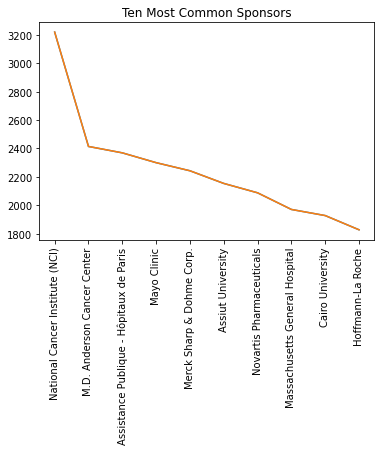

In [0]:
   # initializing the data
x = SponsorfileAMapRDD.map(lambda a: a[0]).take(10)
y = SponsorfileAMapRDD.map(lambda a: a[1]).take(10)
   # plotting the data
plt.plot(x, y)
   # Adding the title
plt.title("Ten Most Common Sponsors")
   # Adding the labels 
plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

Question 6: Plot number of completed studies each month in a given year, the split clinicaltrials RDD was mapped and filtered to get the studies completed in the year under review. It was further reducedByKey to get the counts in each month

In [0]:
MonthbyMonthRDD= SplitfileARDD.map(lambda a: (a[2],a[4]))\
.filter(lambda a: year in a[1])\
.filter(lambda a: 'Completed' in a[0])\
.map(lambda a: (a[1],1))\
.reduceByKey(lambda a, b: a+b)\
.map(lambda a: (a[0].split(' ')[0],a[1]))\
.sortByKey(ascending = False)\
.map(lambda a: (a[0],a[1]))
MonthbyMonthRDD.take(12)

Out[24]: [('Sep', 528),
 ('Oct', 187),
 ('May', 984),
 ('Mar', 1227),
 ('Jun', 1094),
 ('Jul', 819),
 ('Jan', 1131),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967)]

Using the imported calender to sort the months in  chronological order

In [0]:
d = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}

#{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
#'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

MonthlyRDD=MonthbyMonthRDD.sortBy(keyfunc=lambda x: d.get(x[0]))
MonthlyRDD.collect()

Out[25]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]